# RQ6

# Part 1
In this part, we will find the average time a user lets pass before publishing another post. We derive the average for all users and after calculate the average over the whole dataset.
<br>In addition, we extract top three users who are the most actives between all with their following and followers number.

#### Importing required libraries

In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from matplotlib import style

#### Importing Data but only the needed columns

In [ ]:
# Importing 100000 rows at a time
df = pd.DataFrame()
chunks = 100000
for chunk in tqdm(pd.read_csv('Data/instagram_posts.csv', delimiter='\t', usecols=['profile_id', 'cts', 'numbr_likes', 'number_comments'], chunksize=chunks)):
    df=pd.concat([df, chunk], axis=0)

428it [1:05:39,  9.20s/it]


#### Getting a copy a the dataset to leave it untouched for further uses

In [4]:
dfCopy = df.copy()

In [5]:
dfCopy.head()

,profile_id,cts,numbr_likes,number_comments
0,2.237948e+09,2017-08-06 20:06:57.000,80.0,0.0
1,5.579335e+09,2017-06-19 09:31:16.000,25.0,1.0
2,3.134296e+08,2017-03-11 20:05:03.000,9.0,0.0
3,1.837593e+09,2016-09-13 16:27:16.000,4.0,0.0
4,1.131527e+09,2015-10-18 10:19:27.000,8.0,0.0


#### A general information over the whole dataset including number of non-NULL values, value types, the size, and the shape of the dataset.

In [6]:
dfCopy.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42710197 entries, 0 to 42710196
Data columns (total 4 columns):
 #   Column           Non-Null Count     Dtype  
---  ------           --------------     -----  
 0   profile_id       40126905 non-null  float64
 1   cts              42706865 non-null  object 
 2   numbr_likes      42710161 non-null  float64
 3   number_comments  42710161 non-null  float64
dtypes: float64(3), object(1)
memory usage: 1.3+ GB


It can be seen there are NULL values in every column

#### Number of NULL values over the entire dataset

In [7]:
dfCopy.isnull().sum().sum()

2586696

#### Dropping NULL values and check again to see the result of it

In [8]:
# Dropping NULL values
dfCopy.dropna(inplace=True)
dfCopy.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40126905 entries, 0 to 42710196
Data columns (total 4 columns):
 #   Column           Non-Null Count     Dtype  
---  ------           --------------     -----  
 0   profile_id       40126905 non-null  float64
 1   cts              40126905 non-null  object 
 2   numbr_likes      40126905 non-null  float64
 3   number_comments  40126905 non-null  float64
dtypes: float64(3), object(1)
memory usage: 1.5+ GB


#### Counting the amount of dupplicated values and dropping the extras

In [9]:
# Check and see if there are duplicate rows
np.count_nonzero(dfCopy.duplicated())

920

In [10]:
# Dropping dupplicates
dfCopy.drop_duplicates(keep='first', inplace=True)

#### Now we find unique profile IDs and the number of posts each of them has published.

In [11]:
# Finding unique profiles and their frequency in the data set
profiles, freq = np.unique(dfCopy.profile_id, return_counts=True)

In [12]:
# Number of unique profiles
len(profiles)

11833765

#### Extracting profiles that have published at least two posts. This needs to be done to be able to consider time difference between each two consecutive posts.

In [13]:
profiles = profiles[np.where(freq>1)]
#freq = freq[np.where(freq>1)]
len(profiles)

4354672

#### Filtering the profiles that have at least two posts recorded for them:

In [14]:
dfCopy = dfCopy[dfCopy.profile_id.isin(profiles)]

#### The length of the data set after dropping NULLs, duplicates, and profiles with less than two posts:

In [15]:
len(dfCopy)

32646892

##### 32646892 posts is published by 4354672 users. <br><br>

#### Change the format of the timestamps column from string to datetime object to be able to work with it mathematically.

In [16]:
# Changing the time stamps format from string to time object
dfCopy['cts'] = pd.to_datetime(dfCopy['cts'], format='%Y-%m-%d %H:%M:%S.%f')

#### Sorting the timestamps in ascending order to not create a negative time difference.

In [17]:
# Sorting data set based on the times posted to maked them incremental
dfCopy = dfCopy.sort_values(by='cts')

#### Now we calculate, first, the differnece between each two consecutive posts for a user and then derive the average between them.

In [18]:
dfMeanTime = dfCopy.groupby(['profile_id']).apply(lambda x: x.cts.diff().sum()/(x.cts.count()-1))

#### An overlook of mean time of posting for each user:

In [19]:
dfMeanTime.head()

profile_id
3.0    71 days 12:40:48.923076923
4.0    89 days 03:12:52.916666667
11.0              6 days 07:28:52
19.0      61 days 22:49:06.800000
23.0            323 days 15:08:50
dtype: timedelta64[ns]

#### Calculating the average posting time over all users:

In [20]:
meanTime = dfMeanTime.mean()
print(f"The average time between posts is: \n{str(meanTime)}\n")

The average time between posts is: 
76 days 17:06:52.999416750



#### Finding the first three profiles posting more frequently:

In [21]:
dfMeanTime.sort_values(inplace=True)
dfMeanTime=dfMeanTime.to_frame()
dfMeanTime['profile_id'] = dfMeanTime.index
dfMeanTime.index = np.arange(0, len(dfMeanTime), 1)
dfMeanTime.rename(columns={0:'cts'}, inplace=True)
dfMeanTime = dfMeanTime[['profile_id', 'cts']]
dfMeanTime.head()

,profile_id,cts
0,1.750194e+09,0 days
1,3.291067e+09,0 days
2,1.902414e+08,0 days
3,9.197905e+09,0 days
4,2.617240e+08,0 days


#### Looking at the pure value of sorted mean times (without looking at their profile_id).

In [22]:
dfMeanTime.cts[:50]

0              0 days 00:00:00
1              0 days 00:00:00
2              0 days 00:00:00
3              0 days 00:00:00
4              0 days 00:00:00
5              0 days 00:00:00
6              0 days 00:00:00
7              0 days 00:00:00
8              0 days 00:00:00
9              0 days 00:00:00
10             0 days 00:00:00
11             0 days 00:00:00
12             0 days 00:00:00
13             0 days 00:00:00
14             0 days 00:00:00
15             0 days 00:00:00
16             0 days 00:00:00
17             0 days 00:00:00
18             0 days 00:00:00
19             0 days 00:00:00
20             0 days 00:00:00
21             0 days 00:00:00
22             0 days 00:00:00
23             0 days 00:00:00
24             0 days 00:00:00
25             0 days 00:00:00
26             0 days 00:00:00
27             0 days 00:00:00
28             0 days 00:00:00
29             0 days 00:00:00
30             0 days 00:00:00
31             0 days 00:00:00
32      

**Above** you can see there are 39 samples with 0s of average time difference between their posts. <br>
<br>
#### In order to be sure about the results of the **dfMeanTime** about the users with the average of 0s, we do a simple check on one of them:

In [23]:
dfCopy[dfCopy.profile_id==dfMeanTime.profile_id[0]]

,profile_id,cts,numbr_likes,number_comments
6768877,1.750194e+09,2019-04-13 21:22:32,140.0,3.0
6768879,1.750194e+09,2019-04-13 21:22:32,130.0,0.0
6768878,1.750194e+09,2019-04-13 21:22:32,232.0,15.0


#### Importing **instagram_profiles.csv** dataset.

In [24]:
# import profile data and compare it to the topThreeProfile
dfProfiles = pd.read_csv("Data/instagram_profiles.csv", delimiter='\t')

#### Since dfMeanTime is sorted, merging it with **instagram_profiles.csv** dataset, gives out the shared profiles sorted in ascending oreder in terms of average posting time

In [25]:
# Users with the average posting time of 0s:
topUsers = dfMeanTime.merge(dfProfiles[['profile_id', 'following', 'followers']])
topUsers.head()

,profile_id,cts,following,followers
0,9.197905e+09,0 days,30.0,37.0
1,1.823732e+09,0 days,1009.0,30.0
2,6.324740e+09,0 days,1377.0,288.0
3,1.036093e+10,0 days,5115.0,149.0
4,6.824888e+09,0 days,556.0,27.0


#### Bar plotting of #followers and #followings for top three most active users

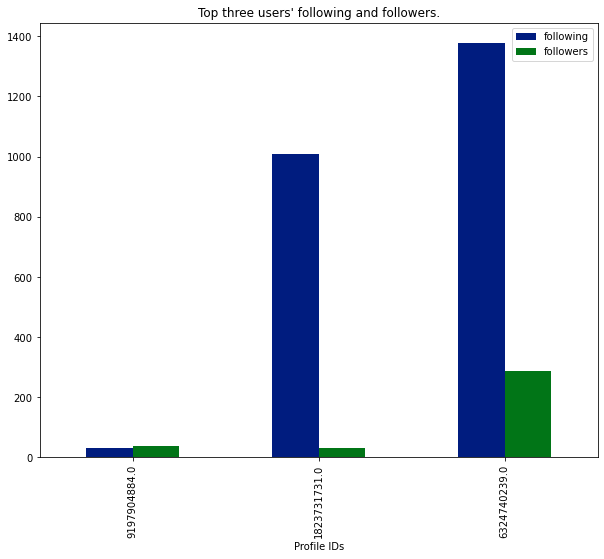

In [26]:
style.use('seaborn-dark-palette')
ax = topUsers.iloc[:3].plot(kind='bar', y=["following", "followers"], figsize=(10,8))
labels = topUsers.profile_id.iloc[:3]
ax.set_xticks([0,1,2], labels)
plt.title("Top three users' following and followers.")
plt.xlabel("Profile IDs")
plt.show()

# Part 2
In this part, we aggregate samples in defined time intervals and then examine to see in which time intervals highest number of likes and comments have been recorded.

#### Taking a copy a the dataset we imported previously

In [27]:
dfTimeIntervals = df.copy()

#### Changing the format of timestamps like before from string to datetime, but this time, we only need the hour value. We intend to define time intervals over a day, 24H, therefore only the hour is needed.

In [28]:
# Changing the time stamps format from string to time object
dfTimeIntervals['cts'] = pd.to_datetime(dfTimeIntervals['cts'], format='%Y-%m-%d %H:%M:%S.%f')
dfCopy = dfTimeIntervals.copy()

In [29]:
# Changing the time stamps into hour only
dfCopy['cts'] = dfCopy.cts.dt.hour

#### Aggregating data based on 2H time interval starting from 00:00:00 until 23:59:59 and then grouping by intervals.

In [30]:
aggregatedData = dfCopy.groupby(pd.cut(dfCopy['cts'],  np.arange(0, 26, 2)))['numbr_likes', 'number_comments'].mean()

/tmp/ipykernel_7412/1042340825.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  aggregatedData = dfCopy.groupby(pd.cut(dfCopy['cts'],  np.arange(0, 26, 2)))['numbr_likes', 'number_comments'].mean()


In [36]:
aggregatedData.head()

,numbr_likes,number_comments
cts,,
"(0, 2]",272.520189,7.726647
"(2, 4]",267.665914,7.135964
"(4, 6]",257.449635,6.703394
"(6, 8]",263.997820,7.393859
"(8, 10]",277.757407,7.493787


In [54]:
print(f"Highest average of likes: {aggregatedData.numbr_likes.max():{2}.{5}}")
print(f"Highest average of comments: {aggregatedData.number_comments.max():{2}.{3}}")

Highest average of likes: 301.6
Highest average of comments: 8.07


#### Taking out maximum likes and comments and associated indices which are the time ranges.

In [31]:
for i in aggregatedData.columns:
    likesMax = aggregatedData.numbr_likes.max()
    likesMaxID = aggregatedData.numbr_likes.idxmax()
    commentsMax = aggregatedData.number_comments.max()
    commentsMaxID = aggregatedData.number_comments.idxmax()

In [56]:
print(f"The maximum amount of average likes is {likesMax:{2}.{4}} and is recorded between {likesMaxID.left}:00:00 and {likesMaxID.right}:00:00")
print(f"The maximum amount of average comments is {commentsMax:{2}.{4}} and is recorded between {commentsMaxID.left}:00:00 and {commentsMaxID.right}:00:00")

The maximum amount of average likes is 301.6 and is recorded between 16:00:00 and 18:00:00
The maximum amount of average comments is 8.069 and is recorded between 18:00:00 and 20:00:00


#### Plotting the achieved results both for likes and comments.

In [35]:
labels = ["00:00:00-02:00:00","02:00:00-04:00:00","04:00:00-06:00:00","06:00:00-08:00:00","08:00:00-10:00:00","10:00:00-12:00:00",
         "12:00:00-14:00:00", "14:00:00-16:00:00","16:00:00-18:00:00","18:00:00-20:00:00","20:00:00-22:00:00","22:00:00-23:59:59"]

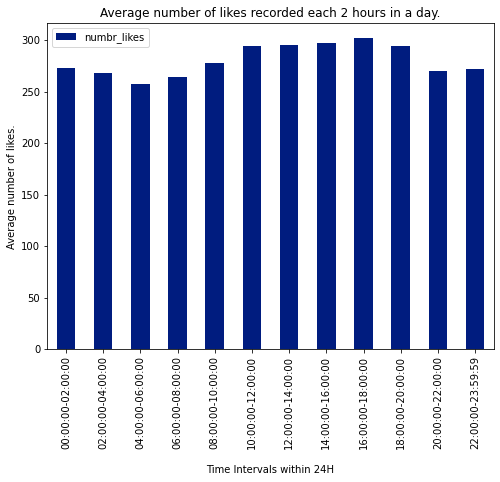

In [48]:
style.use('seaborn-dark-palette')
aggregatedData.plot(kind='bar', y='numbr_likes', figsize=(8,6))
plt.title("Average number of likes recorded each 2 hours in a day.")
plt.xlabel("\nTime Intervals within 24H")
plt.ylabel("Average number of likes.")
plt.xticks(ticks=np.arange(0,12,1),labels=labels)
plt.show()

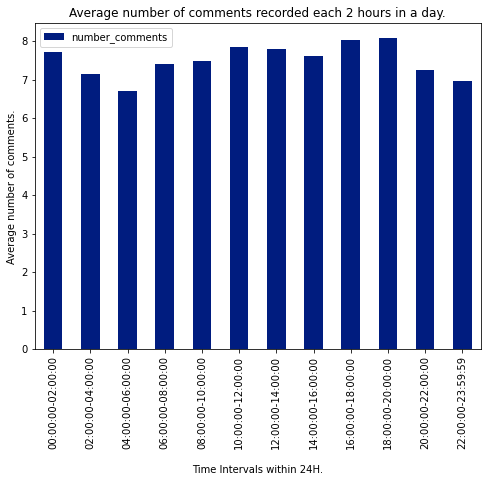

In [49]:
aggregatedData.plot(kind='bar', y='number_comments', figsize=(8,6))
plt.title("Average number of comments recorded each 2 hours in a day.")
plt.xlabel("\nTime Intervals within 24H.")
plt.ylabel("Average number of comments.")
plt.xticks(ticks=np.arange(0,12,1),labels=labels)
plt.show()

#### Based on the plots above, the most comments and likes are recorded on
##### For likes: 16:00:00-18:00:00 -> 301.6
##### For Comments: 18:00:00-20:00:00 -> 8.07